# Assignment 2
Basic Aerodynamics  
s134166 Aleksander Andersen  
s000000 Martin Simon

In [1]:
# Modules
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

deg= u'\N{DEGREE SIGN}'
deg

u'\xb0'

### Part 1 - Planar/rectangular
Employ the fundamental equation of Prandtl’s lifting-line theory to determine the distribution of induced angle of attack along the wing for different aspect ratios, AR, and angles of attack, AOA. Plot the distributions for AR = 4, 6, 8, 10 and AOA = 0°, 5°, 10°. Compute the corresponding induced drag and lift coefficients.

The fundamental equation of Prandtl's lifting line theory is
$$ \alpha(y_0) = \dfrac{\Gamma(y_0)}{\pi V_{\infty}c(y_0)}
+ \alpha_{L=0}(y_0) + \dfrac{1}{4\pi V_{\infty}} \int_{-b/2}^{b/2} \dfrac{(d\Gamma/dy)dy}{y_0-y}$$  
where  
$y$: lifting line axis  
$b$: wing span ( $ \pm b/2$)  

$\text{AR} =b^2/S$  
$S$: area (for rectangular plate)

$S=cb \Rightarrow \text{AR}=b/c$

Eq. 8.44a rewritten with $A_R= b/c$  
$ \sum_{n=1}^\infty A_n \sin{n\theta}
\left( \dfrac{4 \, A_R(\theta)}{m_0(\theta)} + \dfrac{n}{\sin{\theta}}
\right) = \alpha (\theta) - \alpha_{L0}(\theta)$  
Corresponds to matrix equation  
$Ax=b$

In [13]:
def planarWing(AR, alphad):
    m0 = 0.11*180/np.pi
    alpha = alphad *np.pi/180
    alpha_L0 = -4 *np.pi/180
    
    # number of sums 
    n_max = 20 # number of terms in sum
    n = np.linspace(1,n_max,n_max).astype(int)
    
    # number of equations (theta values)
    nEQ = n_max
    nEQ2 = int(nEQ+2)
    theta = np.linspace(np.pi/nEQ, np.pi-np.pi/nEQ, nEQ)
    #theta= theta[1: nEQ2-1]
    
    M = np.empty((nEQ, n_max)) # Empty matrix (100x100)
    b = np.empty( nEQ )
    for i in range(nEQ):
        for j in range(n_max):
            # Calculate coefficients
            M[i,j] = np.sin(n[j]*theta[i]) *(4*AR/m0 + n[j]/np.sin(theta[i]))
        b[i] = alpha-alpha_L0 # RHS
    # Solve system
    An = np.linalg.solve(M,b)
    
    # Calculate induced angles
    alpha_i = np.empty(nEQ) # empty
    for i in range(nEQ):
        alpha_i[i] = sum(n*An*np.sin(n*theta[i])/np.sin(theta[i]))
    
    # Induced lift and drag
    C_L = np.pi*AR * An[0] # eq. (8.51)
    C_D = np.pi*AR * np.sum(n*An**2) # eq. (8.52)
    return n, theta, C_L, C_D, alpha_i, An


AR // AOA :: 4 // 0 deg 
CDi: 0.0065 
Cl: 0.2818

AR // AOA :: 6 // 0 deg 
CDi: 0.0056 
Cl: 0.3170

AR // AOA :: 8 // 0 deg 
CDi: 0.0049 
Cl: 0.3386

AR // AOA :: 10 // 0 deg 
CDi: 0.0043 
Cl: 0.3532


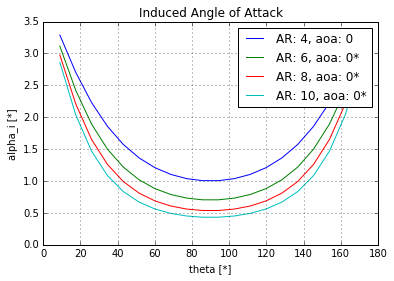

In [14]:
## PLOTTING RESULTS FOR 2.1

plt.figure()
AR, alphad = 4, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 6, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 8, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 10, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [*]')
plt.ylabel('alpha_i [*]')
plt.grid()
plt.legend()


AR // AOA :: 4 // 5 deg 
CDi: 0.0329 
Cl: 0.6341

AR // AOA :: 6 // 5 deg 
CDi: 0.0283 
Cl: 0.7133

AR // AOA :: 8 // 5 deg 
CDi: 0.0246 
Cl: 0.7617

AR // AOA :: 10 // 5 deg 
CDi: 0.0218 
Cl: 0.7947


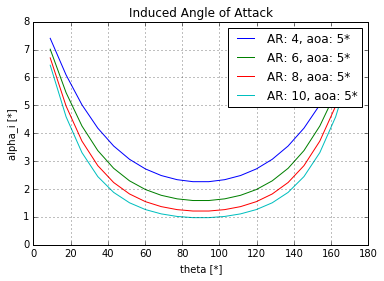

In [15]:
plt.figure()
AR, alphad = 4, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 6, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 8, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 10, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [*]')
plt.ylabel('alpha_i [*]')
plt.grid()
plt.legend()


AR // AOA :: 4 // 10 deg 
CDi: 0.0796 
Cl: 0.9863

AR // AOA :: 6 // 10 deg 
CDi: 0.0684 
Cl: 1.1095

AR // AOA :: 8 // 10 deg 
CDi: 0.0596 
Cl: 1.1849

AR // AOA :: 10 // 10 deg 
CDi: 0.0528 
Cl: 1.2363


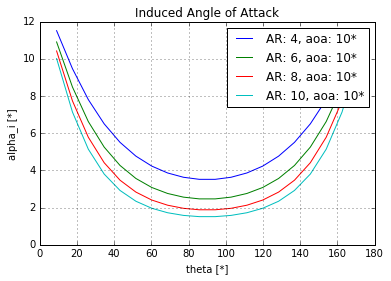

In [16]:
plt.figure()
AR, alphad = 4, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 6, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 8, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

AR, alphad = 10, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [*]')
plt.ylabel('alpha_i [*]')
plt.grid()
plt.legend()


AR // AOA :: 4 // 0 deg 
CDi: 0.0065 
Cl: 0.2818

AR // AOA :: 4 // 5 deg 
CDi: 0.0329 
Cl: 0.6341

AR // AOA :: 4 // 10 deg 
CDi: 0.0796 
Cl: 0.9863

AR // AOA :: 6 // 0 deg 
CDi: 0.0056 
Cl: 0.3170

AR // AOA :: 6 // 5 deg 
CDi: 0.0283 
Cl: 0.7133

AR // AOA :: 6 // 10 deg 
CDi: 0.0684 
Cl: 1.1095

AR // AOA :: 8 // 0 deg 
CDi: 0.0049 
Cl: 0.3386

AR // AOA :: 8 // 5 deg 
CDi: 0.0246 
Cl: 0.7617

AR // AOA :: 8 // 10 deg 
CDi: 0.0596 
Cl: 1.1849

AR // AOA :: 10 // 0 deg 
CDi: 0.0043 
Cl: 0.3532

AR // AOA :: 10 // 5 deg 
CDi: 0.0218 
Cl: 0.7947

AR // AOA :: 10 // 10 deg 
CDi: 0.0528 
Cl: 1.2363


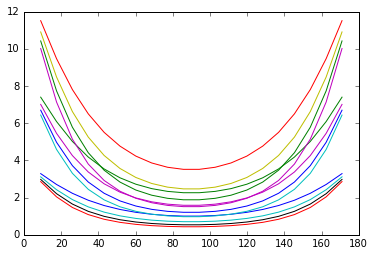

In [18]:
# All combinations - Plotted in same window
plt.figure()
for i in [4,6, 8,10]:
    for j in [0, 5, 10]:
        AR, alphad = i, j
        n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
        plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR, alphad))
        print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))

#plt.legend()

### Part 2 - Elliptic
Compute the induced angle of attack and induced drag coefficient for an elliptic wing with the same aspect ratios. Compare and discuss the solutions.  
  

In [26]:
def ellipticWing(AR, alphad):
    alpha_L0 = -4.0

    # Induced lift and drag
    C_L = (2.0*np.pi/(1.0+2.0/AR))*(alphad*np.pi/180.0-alpha_L0*np.pi/180.0) 
    alpha_i = C_L/(np.pi*AR) * 180.0/np.pi
    C_D = C_L**2.0/(np.pi*AR)
    # Returns 'Induced Lift', 'Induced Drag', and 'induced AOA' in degrees.
    return C_L, C_D, alpha_i

In [27]:
# Print results for all combinations for the elliptic case.
for i in [4,6, 8,10]:
    for j in [0, 5, 10]:
        AR, alphad = i, j
        Cl,Cd,ai = ellipticWing(AR, alphad)
        print('\nAR // AOA :: {0:.0f} // {1:.0f} deg \nCDi: {2:.4f} \nCl: {3:.4f}'.format(AR, alphad, Cd, Cl))
        print('Induced angle: {0:.2f} deg'.format(ai))


AR // AOA :: 4 // 0 deg 
CDi: 0.0068 
Cl: 0.2924
Induced angle: 1.33 deg

AR // AOA :: 4 // 5 deg 
CDi: 0.0345 
Cl: 0.6580
Induced angle: 3.00 deg

AR // AOA :: 4 // 10 deg 
CDi: 0.0834 
Cl: 1.0235
Induced angle: 4.67 deg

AR // AOA :: 6 // 0 deg 
CDi: 0.0057 
Cl: 0.3290
Induced angle: 1.00 deg

AR // AOA :: 6 // 5 deg 
CDi: 0.0291 
Cl: 0.7402
Induced angle: 2.25 deg

AR // AOA :: 6 // 10 deg 
CDi: 0.0703 
Cl: 1.1515
Induced angle: 3.50 deg

AR // AOA :: 8 // 0 deg 
CDi: 0.0049 
Cl: 0.3509
Induced angle: 0.80 deg

AR // AOA :: 8 // 5 deg 
CDi: 0.0248 
Cl: 0.7896
Induced angle: 1.80 deg

AR // AOA :: 8 // 10 deg 
CDi: 0.0600 
Cl: 1.2282
Induced angle: 2.80 deg

AR // AOA :: 10 // 0 deg 
CDi: 0.0043 
Cl: 0.3655
Induced angle: 0.67 deg

AR // AOA :: 10 // 5 deg 
CDi: 0.0215 
Cl: 0.8225
Induced angle: 1.50 deg

AR // AOA :: 10 // 10 deg 
CDi: 0.0521 
Cl: 1.2794
Induced angle: 2.33 deg


### Part 3-5 (Tapered wing)

In [65]:
def taperedWing(AR, TR, alphad):
    m0 = 0.11*180/np.pi
    alpha = alphad *np.pi/180
    alpha_L0 = -4 *np.pi/180
    
    # number of sums 
    n_max = 20 # number of terms in sum
    n = np.linspace(1,n_max,n_max).astype(int)
    
    # number of equations (theta values)
    nEQ = n_max
    nEQ2 = int(nEQ+2)
    theta = np.linspace(np.pi/nEQ, np.pi-np.pi/nEQ, nEQ)
    #theta= theta[1: nEQ2-1]
    
    M = np.empty((nEQ, n_max)) # Empty matrix (100x100)
    b = np.empty( nEQ )
    for i in range(nEQ):
        for j in range(n_max):
            # Calculate coefficients
            M[i,j] = np.sin(n[j]*theta[i])*(4*AR/(TR*m0) + n[j]/np.sin(theta[i])) #!!!!!!!!!change should depend on theta
        b[i] = alpha-alpha_L0 
    # Solve system
    An = np.linalg.solve(M,b)
    # Calculate induced angles
    alpha_i = np.empty(nEQ) # empty
    for i in range(nEQ):
        alpha_i[i] = sum(n*An*np.sin(n*theta[i])/np.sin(theta[i]))
    
    
    #Gamma calculation

    for i in range(n_max):
        # Calculate Gamma
        Gamma[i] = AR np.sin(n[j]*theta[i]) *(8*AR/(TR*m0) + np.sin(n[j]*theta[i])
    b[i] = alpha-alpha_L0     
    
    
    # Induced lift and drag
    C_L = np.pi*AR * An[0] # eq. (8.51)
    C_D = np.pi*AR * np.sum(n*An**2) # eq. (8.52)
    return n, theta, C_L, C_D, alpha_i, An

In [66]:
def WingPlot(AR,TR,alphad):

    for i in range(0,len(alphad)):
        plt.figure()
        for j in range(0,len(AR)):
            n,theta,Cl,Cd,ai,An = taperedWing(AR[j], TR, alphad[i])
            plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}'.format(AR[j], alphad[i]))

        plt.title('Induced Angle of Attack')
        plt.xlabel('theta [*]')
        plt.ylabel('alpha_i [*]')
        plt.grid()
        plt.legend()
    plt.figure()
    
    for i in range(0,len(alphad)):
        for j in range(0,len(AR)):
            n, theta, Cl, Cd, ai, An = taperedWing(AR[j], TR, alphad[i])
            plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}*'.format(AR[j], alphad[i]))
    #plt.legend()

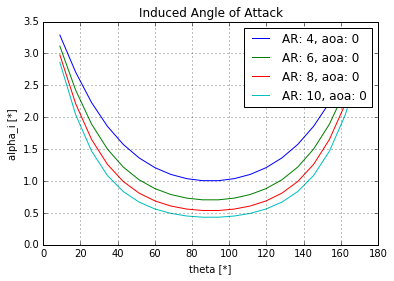

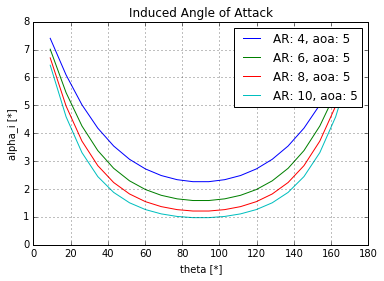

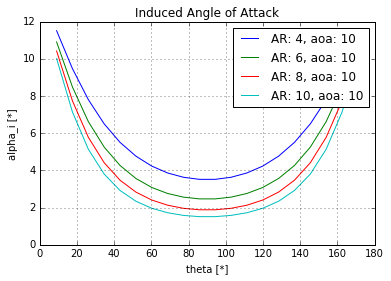

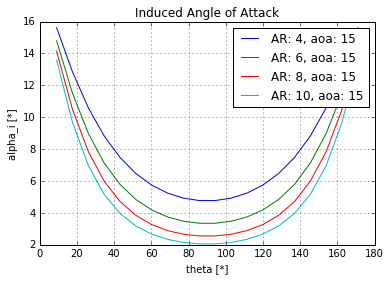

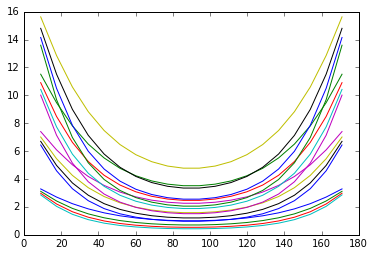

In [67]:
AR=[4, 6, 8, 10]
TR=1
alphad=[0, 5, 10, 15]

WingPlot(AR,TR,alphad)
